### Solving data on sample dataset

In [2]:
from shapely.geometry import Point
import os
import pandas as pd
import geopandas as gp
import matplotlib.pylab as pl
import seaborn as sns
import pysal as ps
import matplotlib as mpl
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
#Finding bbox
borough = gp.read_file('data/nycShapefile/nybb_17c/nybb.shp')
borough.to_crs({'init': 'epsg:4326'}, inplace=True)
bbox = borough.join(borough.bounds)
bbox.head()

,BoroCode,BoroName,Shape_Area,Shape_Leng,geometry,minx,miny,maxx,maxy
0,5,Staten Island,1.623914e+09,330437.103648,(POLYGON ((-74.05050806403249 40.5664220341941...,-74.255591,40.496115,-74.049236,40.648926
1,2,Bronx,1.186678e+09,464365.638670,(POLYGON ((-73.89680883223768 40.7958084451931...,-73.933606,40.785357,-73.765332,40.915533
2,4,Queens,3.044780e+09,895720.956401,(POLYGON ((-73.83668274106698 40.5949466970491...,-73.962620,40.541834,-73.700009,40.801011
3,3,Brooklyn,1.937478e+09,741077.854437,(POLYGON ((-73.86706149472113 40.5820879768267...,-74.041896,40.569530,-73.833559,40.739128
4,1,Manhattan,6.364799e+08,361050.577478,(POLYGON ((-74.01092841268033 40.6844914725762...,-74.047730,40.682917,-73.906651,40.879038


## Comment after use

In [4]:
# # Creating sample of 1000
# train = pd.read_csv('data/train.csv')
# sample = train.sample(n=10000)
# sample.to_csv('data/sample.csv')

## Use sample always

In [5]:
sample = pd.read_csv('data/sample.csv')
sample.drop(['Unnamed: 0'], axis=1, inplace=True)
sample.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2360876,1,2016-02-17 20:36:27,2016-02-17 20:36:54,2,-73.995819,40.735168,-73.995529,40.735031,N,27
1,id0241669,2,2016-05-06 13:49:25,2016-05-06 13:51:40,2,-73.965881,40.765236,-73.968452,40.761707,N,135
2,id2435786,2,2016-06-24 11:52:54,2016-06-24 12:21:32,2,-73.950119,40.775822,-73.982101,40.751556,N,1718
3,id0570399,2,2016-04-19 23:40:57,2016-04-19 23:55:50,1,-73.990585,40.727455,-73.995529,40.759827,N,893
4,id2243262,2,2016-06-26 20:41:47,2016-06-26 20:58:29,2,-73.964882,40.759808,-73.988556,40.718536,N,1002


In [6]:
#Filtering points in Manhattan
sample = sample[((sample.pickup_longitude >= -74.047730) & (sample.pickup_longitude <= -73.906651) \
       & (sample.pickup_latitude >=40.682917) & (sample.pickup_latitude <= 40.879038)) &\
      ((sample.dropoff_longitude >= -74.047730) & (sample.dropoff_longitude <= -73.906651) \
       & (sample.dropoff_latitude >=40.682917) & (sample.dropoff_latitude <= 40.879038))]
sample.reset_index(inplace=True, drop=True)
sample.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2360876,1,2016-02-17 20:36:27,2016-02-17 20:36:54,2,-73.995819,40.735168,-73.995529,40.735031,N,27
1,id0241669,2,2016-05-06 13:49:25,2016-05-06 13:51:40,2,-73.965881,40.765236,-73.968452,40.761707,N,135
2,id2435786,2,2016-06-24 11:52:54,2016-06-24 12:21:32,2,-73.950119,40.775822,-73.982101,40.751556,N,1718
3,id0570399,2,2016-04-19 23:40:57,2016-04-19 23:55:50,1,-73.990585,40.727455,-73.995529,40.759827,N,893
4,id2243262,2,2016-06-26 20:41:47,2016-06-26 20:58:29,2,-73.964882,40.759808,-73.988556,40.718536,N,1002


In [7]:
#Creating Pickup point geometry
geomPick= gp.GeoSeries([Point(xy) for xy in zip(sample.pickup_longitude, sample.pickup_latitude)])

gdfPickup = gp.GeoDataFrame(sample, geometry = geomPick)
gdfPickup.crs = {'init' : 'epsg:4326'}

#Finding points within New York
gdfPickup = gp.sjoin(borough, gdfPickup)
gdfPickup = gdfPickup[gdfPickup.BoroName == 'Manhattan']
gdfPickup.set_index(gdfPickup.index_right, inplace=True)
gdfPickup.head()

,BoroCode,BoroName,Shape_Area,Shape_Leng,geometry,index_right,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
index_right,,,,,,,,,,,,,,,,,
445,1,Manhattan,6.364799e+08,361050.577478,(POLYGON ((-74.01092841268033 40.6844914725762...,445,id3161069,1,2016-01-27 20:54:00,2016-01-27 21:26:05,1,-73.974899,40.761585,-74.012093,40.707008,N,1925
705,1,Manhattan,6.364799e+08,361050.577478,(POLYGON ((-74.01092841268033 40.6844914725762...,705,id0179590,1,2016-06-23 13:34:25,2016-06-23 13:58:39,2,-73.974884,40.762280,-73.996620,40.725410,N,1454
5856,1,Manhattan,6.364799e+08,361050.577478,(POLYGON ((-74.01092841268033 40.6844914725762...,5856,id3204053,1,2016-02-18 16:39:46,2016-02-18 16:51:53,1,-73.974876,40.763359,-73.985733,40.744415,N,727
6864,1,Manhattan,6.364799e+08,361050.577478,(POLYGON ((-74.01092841268033 40.6844914725762...,6864,id0478612,1,2016-03-16 23:54:48,2016-03-17 00:07:47,2,-73.974838,40.761822,-73.998245,40.722778,N,779
1428,1,Manhattan,6.364799e+08,361050.577478,(POLYGON ((-74.01092841268033 40.6844914725762...,1428,id1128714,2,2016-03-24 14:35:10,2016-03-24 14:41:36,1,-73.974747,40.761570,-73.976410,40.754822,N,386


In [8]:
#Creating Dropoff point geometry
geomDrop = gp.GeoSeries([Point(xy) for xy in zip(sample.dropoff_longitude, sample.dropoff_latitude)])

gdfDropoff = gp.GeoDataFrame(sample, geometry = geomDrop)
gdfDropoff.crs = {'init' : 'epsg:4326'}

#Finding points within New York
gdfDropoff = gp.sjoin(borough, gdfDropoff)
gdfDropoff = gdfDropoff[gdfDropoff.BoroName == 'Manhattan']
gdfDropoff.set_index(gdfDropoff.index_right, inplace=True)
gdfDropoff.head()

,BoroCode,BoroName,Shape_Area,Shape_Leng,geometry,index_right,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
index_right,,,,,,,,,,,,,,,,,
3104,1,Manhattan,6.364799e+08,361050.577478,(POLYGON ((-74.01092841268033 40.6844914725762...,3104,id2299133,2,2016-02-19 16:42:15,2016-02-19 16:44:31,1,-73.956413,40.767441,-73.959618,40.773571,N,136
4852,1,Manhattan,6.364799e+08,361050.577478,(POLYGON ((-74.01092841268033 40.6844914725762...,4852,id2630126,1,2016-05-16 15:24:25,2016-05-16 15:34:47,3,-73.962410,40.779202,-73.959938,40.773624,N,622
8848,1,Manhattan,6.364799e+08,361050.577478,(POLYGON ((-74.01092841268033 40.6844914725762...,8848,id0885100,2,2016-05-01 11:46:50,2016-05-01 11:50:54,5,-73.947098,40.771820,-73.959793,40.773701,N,244
6191,1,Manhattan,6.364799e+08,361050.577478,(POLYGON ((-74.01092841268033 40.6844914725762...,6191,id1496946,2,2016-03-31 10:20:02,2016-03-31 10:30:39,1,-73.981934,40.778782,-73.961983,40.773788,N,637
7625,1,Manhattan,6.364799e+08,361050.577478,(POLYGON ((-74.01092841268033 40.6844914725762...,7625,id2668890,1,2016-05-02 22:49:40,2016-05-02 22:51:00,1,-73.960304,40.773617,-73.960976,40.773800,N,80


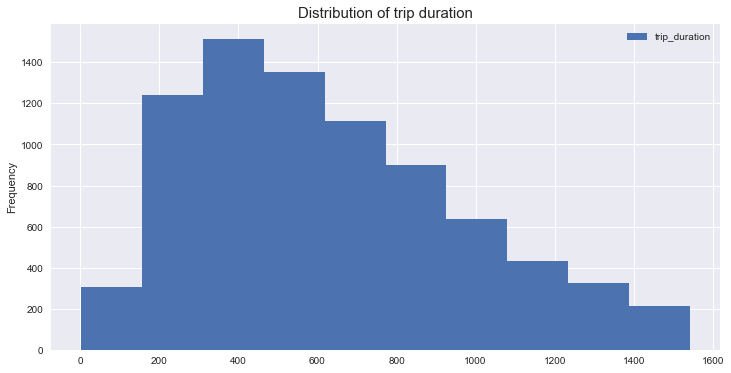

In [9]:
#Finding only Manhattan Riders
sampleManhattan = pd.merge(gdfPickup, gdfDropoff,on='index_right', how='inner')
sampleManhattan = sampleManhattan[[  u'id_x',
                u'vendor_id_x',    u'pickup_datetime_x',
         u'dropoff_datetime_x',    u'passenger_count_x',
         u'pickup_longitude_x',    u'pickup_latitude_x',
        u'dropoff_longitude_x',   u'dropoff_latitude_x',
       u'store_and_fwd_flag_x',      u'trip_duration_x']]
for col in sampleManhattan.columns:
    sampleManhattan.rename(columns={col : col[:-2]}, inplace=True)
    
    
#Eliminating spurious data / outliers (selecting trip durations in the top 95th percentile)
sampleManhattan = sampleManhattan[sampleManhattan.trip_duration <= sampleManhattan.trip_duration.quantile(q = 0.95)]
sampleManhattan.reset_index(inplace= True, drop=True)
sampleManhattan.trip_duration.plot(kind='hist', figsize=(12,6))
plt.title('Distribution of trip duration', fontsize = 15)
plt.legend()

In [10]:
ct2010 = gp.read_file('data/nyct2010_17c/nyct2010.shp')
ct2010.to_crs({'init':'epsg:4326'}, inplace=True)
ct2010 = ct2010[ct2010.BoroCode == '1']
ct2010.head()

,BoroCT2010,BoroCode,BoroName,CDEligibil,CT2010,CTLabel,NTACode,NTAName,PUMA,Shape_Area,Shape_Leng,geometry
1,1009800,1,Manhattan,I,009800,98,MN19,Turtle Bay-East Midtown,3808,1.906016e+06,5534.199811,POLYGON ((-73.96432543478755 40.75638153102422...
2,1010000,1,Manhattan,I,010000,100,MN19,Turtle Bay-East Midtown,3808,1.860938e+06,5692.168737,"POLYGON ((-73.9680243691585 40.75957814008615,..."
3,1010200,1,Manhattan,I,010200,102,MN17,Midtown-Midtown South,3807,1.860993e+06,5687.802439,POLYGON ((-73.97124277307125 40.76093641851239...
4,1010400,1,Manhattan,I,010400,104,MN17,Midtown-Midtown South,3807,1.864600e+06,5693.036367,POLYGON ((-73.97445730550223 40.76229308355821...
5,1011300,1,Manhattan,I,011300,113,MN17,Midtown-Midtown South,3807,1.890907e+06,5699.860641,POLYGON ((-73.98411754823195 40.75484205349794...


# Analysing pickups

In [68]:
pickupSample = sampleManhattan.copy()
geom= gp.GeoSeries([Point(xy) for xy in zip(pickupSample.pickup_longitude, pickupSample.pickup_latitude)])
pickupSample = gp.GeoDataFrame(pickupSample, geometry = geom)
pickupSample.crs = {'init' : 'epsg:4326'}
pickupSample = gp.sjoin(pickupSample, ct2010)
pickupSample.drop([u'index_right',   u'BoroCT2010', u'BoroCode', u'BoroName',   u'CDEligibil',  u'CTLabel',   
                   u'NTACode',  u'NTAName',  u'PUMA',   u'Shape_Area', u'Shape_Leng', u'pickup_longitude', 
                   u'pickup_latitude',  u'dropoff_longitude',   u'dropoff_latitude'], axis=1, inplace=True)
pickupSample.reset_index(inplace=True, drop=True)
pickupSample.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,store_and_fwd_flag,trip_duration,geometry,CT2010
0,id0179590,1,2016-06-23 13:34:25,2016-06-23 13:58:39,2,N,1454,POINT (-73.9748840332 40.7622795105),010400
1,id0478612,1,2016-03-16 23:54:48,2016-03-17 00:07:47,2,N,779,POINT (-73.9748382568 40.7618217468),010400
2,id1597704,1,2016-02-08 12:28:59,2016-02-08 12:43:21,2,Y,862,POINT (-73.97468566890001 40.7622261047),010400
3,id2838213,1,2016-06-01 17:54:48,2016-06-01 18:00:17,1,N,329,POINT (-73.97463226319999 40.7622032166),010400
4,id0873357,1,2016-06-04 23:47:58,2016-06-04 23:59:39,1,N,701,POINT (-73.98085784910001 40.7592926025),010400


In [69]:
count = pickupSample.groupby(by='CT2010').count()
count.reset_index(inplace=True)
count = count[['CT2010', 'geometry']]

avgPassangerCount = pickupSample.groupby(by='CT2010').mean()
avgPassangerCount.reset_index(inplace=True)
avgPassangerCount = avgPassangerCount[['CT2010', 'passenger_count']]

countdf = pd.merge(count, avgPassangerCount, on='CT2010')
countdf.rename(columns={'geometry':'countPerCT', 'passenger_count':'meanPassengerCount'}, inplace=True)
countdf.head()

,CT2010,countPerCT,meanPassengerCount
0,000201,1,1.000
1,000600,2,2.000
2,000700,24,1.625
3,000800,2,1.000
4,000900,20,1.850


In [70]:
ct2010Agg = pd.merge(ct2010, countdf, on='CT2010', how='inner')
ct2010Agg = gp.GeoDataFrame(ct2010Agg)
ct2010Agg.crs = {'init':'epsg:4326'}
ct2010Agg.head()

,BoroCT2010,BoroCode,BoroName,CDEligibil,CT2010,CTLabel,NTACode,NTAName,PUMA,Shape_Area,Shape_Leng,geometry,countPerCT,meanPassengerCount
0,1009800,1,Manhattan,I,009800,98,MN19,Turtle Bay-East Midtown,3808,1.906016e+06,5534.199811,POLYGON ((-73.96432543478755 40.75638153102422...,83,1.650602
1,1010000,1,Manhattan,I,010000,100,MN19,Turtle Bay-East Midtown,3808,1.860938e+06,5692.168737,"POLYGON ((-73.9680243691585 40.75957814008615,...",100,1.560000
2,1010200,1,Manhattan,I,010200,102,MN17,Midtown-Midtown South,3807,1.860993e+06,5687.802439,POLYGON ((-73.97124277307125 40.76093641851239...,95,1.610526
3,1010400,1,Manhattan,I,010400,104,MN17,Midtown-Midtown South,3807,1.864600e+06,5693.036367,POLYGON ((-73.97445730550223 40.76229308355821...,79,1.506329
4,1011300,1,Manhattan,I,011300,113,MN17,Midtown-Midtown South,3807,1.890907e+06,5699.860641,POLYGON ((-73.98411754823195 40.75484205349794...,114,1.649123


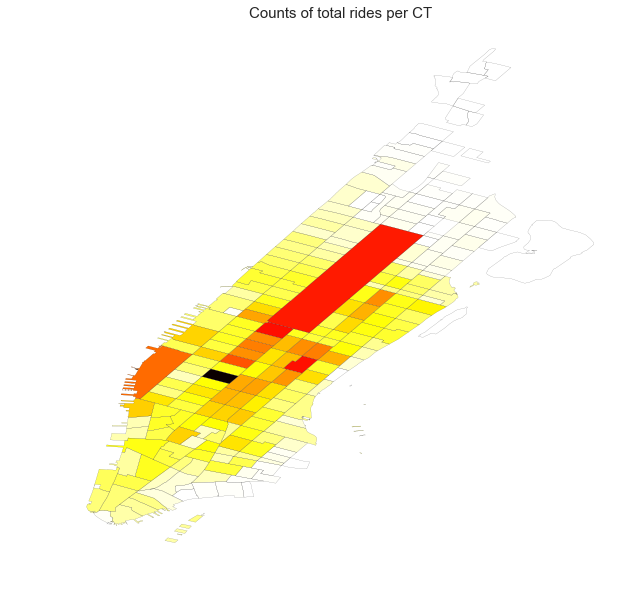

In [71]:
f, ax = plt.subplots(figsize=(10,10))
ct2010Agg.plot(column='countPerCT',cmap='hot_r',
                         alpha=1,linewidth=0.1,ax=ax)
plt.xlabel('Longitude', fontsize = 13)
plt.ylabel('Latitude', fontsize = 13)
plt.title("Counts of total rides per CT", fontsize = 15)
ax.set_axis_off()

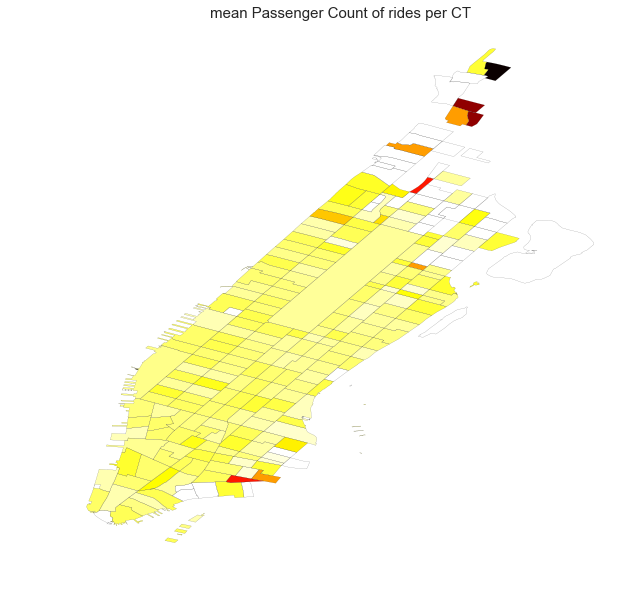

In [72]:
f, ax = plt.subplots(figsize=(10,10))
ct2010Agg.plot(column='meanPassengerCount',cmap='hot_r',
                         alpha=1,linewidth=0.1,ax=ax)
plt.xlabel('Longitude', fontsize = 13)
plt.ylabel('Latitude', fontsize = 13)
plt.title("mean Passenger Count of rides per CT", fontsize = 15)
ax.set_axis_off()

In [73]:
#Saving as shapefile
ct2010Agg.to_file('data/nyct2010_17c/ct2010AggPickUp.shp')

### Spatial Weights

In [74]:
qwCT = ps.queen_from_shapefile('data/nyct2010_17c/ct2010AggPickUp.shp')
Wmatrix, ids = qwCT.full()
qwCT.transform = 'r'

('WARNING: ', 112, ' is an island (no neighbors)')
('WARNING: ', 124, ' is an island (no neighbors)')
('WARNING: ', 172, ' is an island (no neighbors)')


### Analysis of counts of taxi trips

In [75]:
counts=ct2010Agg.countPerCT
countsLag=ps.lag_spatial(qwCT, counts)
countsLag10 = ps.Quantiles(countsLag, k=10)
countsLag10

               Quantiles                
 
Lower            Upper             Count
         x[i] <=  2.783               24
 2.783 < x[i] <=  5.500               25
 5.500 < x[i] <= 18.520               23
18.520 < x[i] <= 27.800               24
27.800 < x[i] <= 36.625               24
36.625 < x[i] <= 44.580               23
44.580 < x[i] <= 48.669               24
48.669 < x[i] <= 59.779               24
59.779 < x[i] <= 73.350               24
73.350 < x[i] <= 91.000               24

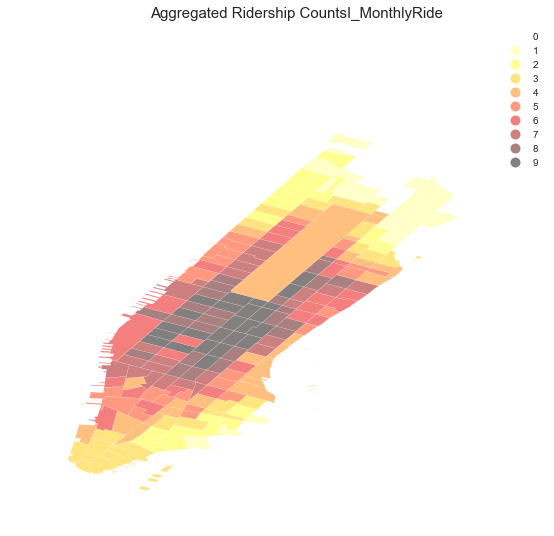

In [76]:
f, ax = plt.subplots(figsize=(9, 9))
ct2010Agg.assign(cl=countsLag10.yb).plot(column='cl', categorical=True, 
        k=10, cmap='hot_r', linewidth=0.1, ax=ax, 
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.title("Aggregated Ridership CountsI_MonthlyRide", fontsize = 15)

### Global Moran's I

In [77]:
globalMoranI = ps.Moran(counts, qwCT)
print "Spatial Autocorrelation index is %s which has p-val %s"%(globalMoranI.I, globalMoranI.p_sim)

Spatial Autocorrelation index is 0.563316840475 which has p-val 0.001


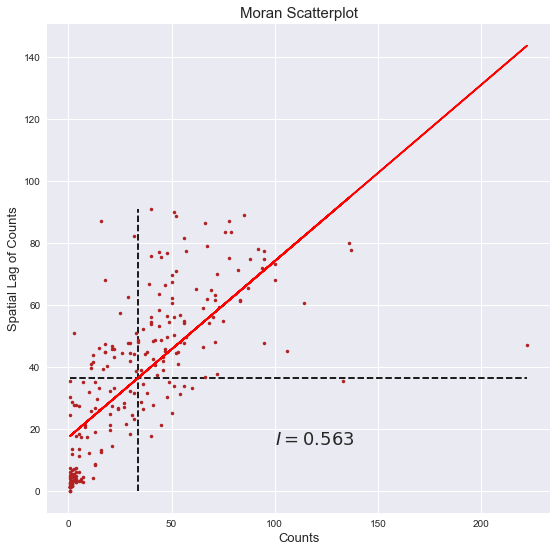

In [78]:
b, a = np.polyfit(counts, countsLag, 1)

f, ax = plt.subplots(1, figsize=(9, 9))

plt.plot(counts, countsLag, '.', color='firebrick')

 # dashed vert at mean of the last year's PCI
plt.vlines(counts.mean(), countsLag.min(), countsLag.max(), linestyle='--')
 # dashed horizontal at mean of lagged PCI
plt.hlines(countsLag.mean(), counts.min(), counts.max(), linestyle='--')

plt.text(s='$I = %.3f$' % globalMoranI.I, x=100, y=15, fontsize=18)
# red line of best fit using global I as slope
plt.plot(counts, a + b*counts, 'r')
plt.title('Moran Scatterplot', fontsize = 15)
plt.ylabel('Spatial Lag of Counts', fontsize = 13)
plt.xlabel('Counts', fontsize = 13)

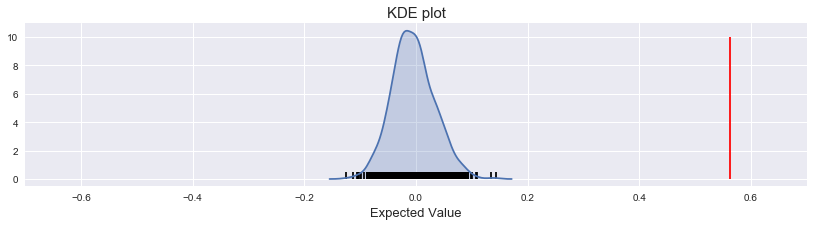

In [79]:
plt.rcParams['figure.figsize']=(14,3)

sns.kdeplot(globalMoranI.sim, shade=True)
plt.vlines(globalMoranI.sim, 0, 0.5)
plt.vlines(globalMoranI.I, 0, 10, 'r')
plt.xlim([-.70, .70])
plt.title('KDE plot', fontsize = 15)
plt.xlabel('Expected Value', fontsize = 13)

### Local Indicator of Spatial Autocorrelation (LISA)

In [80]:
LMo_count = ps.Moran_Local(counts, qwCT,permutations=999)
LMo_count.Is[0:5], LMo_count.p_sim[0:5]

(array([ 1.32207722,  2.52503298,  2.44600793,  2.1810316 ,  2.09276214]),
 array([ 0.026,  0.002,  0.004,  0.002,  0.022]))

In [81]:
sigs = counts[LMo_count.p_sim <= .001]
W_sigs = countsLag[LMo_count.p_sim  <= .001]
insigs = counts[LMo_count.p_sim > .001]
W_insigs = countsLag[LMo_count.p_sim > .001]

### Significant LISA

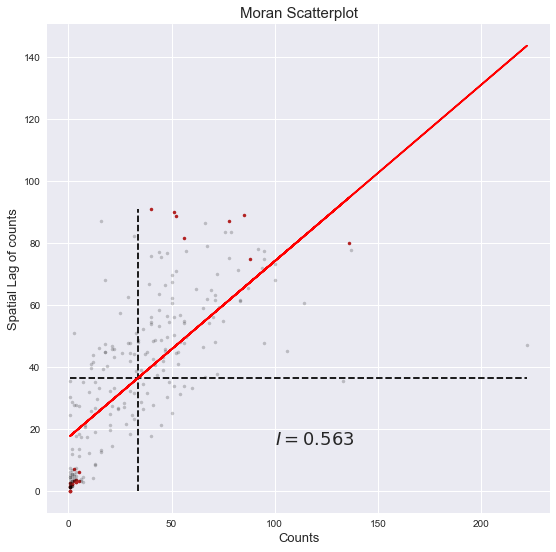

In [82]:
f, ax = plt.subplots(figsize=(9, 9))
plt.plot(sigs, W_sigs, '.', color='firebrick')
plt.plot(insigs, W_insigs, '.k', alpha=.2)
plt.text(s='$I = %.3f$' % globalMoranI.I, x=100, y=15, fontsize=18)

 # dashed vert at mean of the last year's PCI
plt.vlines(counts.mean(), countsLag.min(), countsLag.max(), linestyle='--')
 # dashed horizontal at mean of lagged PCI
plt.hlines(countsLag.mean(), counts.min(), counts.max(), linestyle='--')

# red line of best fit using global I as slope
plt.plot(counts, a + b*counts, 'r')
plt.title('Moran Scatterplot', fontsize = 15)
plt.ylabel('Spatial Lag of counts', fontsize = 13)
plt.xlabel('Counts', fontsize = 13)

In [83]:
sig = LMo_count.p_sim < 0.01
hotspots = LMo_count.q==1 * sig
coldspots = LMo_count.q==3 * sig
print "Number of Hotspots:", hotspots.sum()
print "Number of Coldspots:", coldspots.sum()

Number of Hotspots: 29
Number of Coldspots: 40


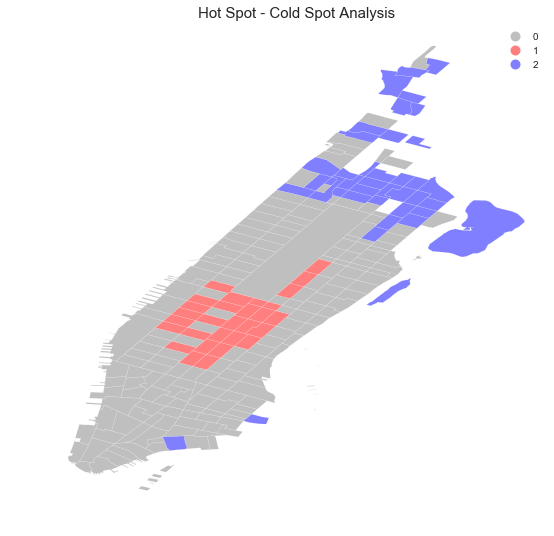

In [84]:
hcmap = mpl.colors.ListedColormap(['grey','red','blue'])
hotcold = hotspots*1 + coldspots*2

f, ax = plt.subplots(figsize=(9, 9))
ct2010Agg.assign(cl=hotcold).plot(column='cl', categorical=True, 
         cmap=hcmap, linewidth=0.1, ax=ax, 
         edgecolor='white', legend=True)
ax.set_axis_off()
plt.title("Hot Spot - Cold Spot Analysis", fontsize = 15)

### Pickups are concerntrated in the Midtown area with a hot spot around that neighbourhood and particularly low in the Harlem neighbourhood and the upper east above Central Park

In [85]:
sig = LMo_count.p_sim < 0.01
hotspots = LMo_count.q==1 * sig
coldspots = LMo_count.q==3 * sig
LH = LMo_count.q == 2 * sig
HL = LMo_count.q == 4 * sig
print "Number of Hotspots:", hotspots.sum()
print "Number of Coldspots:", coldspots.sum()
print "Number of Low Hot:", LH.sum()
print "Number of Hot Low", HL.sum()

Number of Hotspots: 29
Number of Coldspots: 40
Number of Low Hot: 2
Number of Hot Low 0


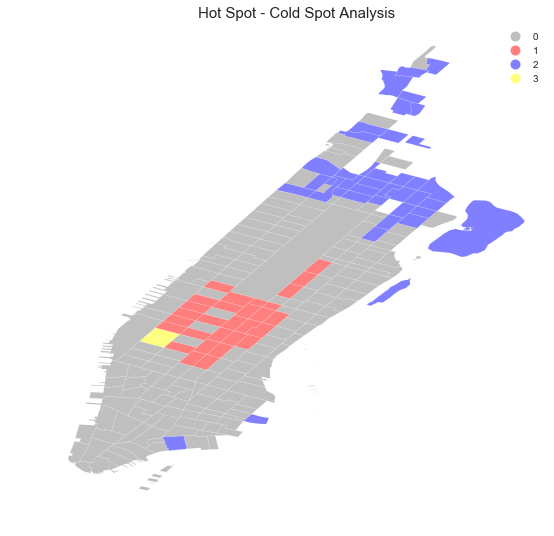

In [86]:
hcmap = mpl.colors.ListedColormap(['grey','red','blue', 'yellow' ])
hotcold = hotspots*1 + coldspots*2 + LH * 3 

f, ax = plt.subplots(figsize=(9, 9))
ct2010Agg.assign(cl=hotcold).plot(column='cl', categorical=True, 
         cmap=hcmap, linewidth=0.1, ax=ax, 
         edgecolor='white', legend=True)
ax.set_axis_off()
plt.title("Hot Spot - Cold Spot Analysis", fontsize = 15)

### Drop Off Analysis

In [28]:
dropoffSample = sampleManhattan.copy()
geom= gp.GeoSeries([Point(xy) for xy in zip(dropoffSample.dropoff_longitude, dropoffSample.dropoff_latitude)])
dropoffSample = gp.GeoDataFrame(dropoffSample, geometry = geom)
dropoffSample.crs = {'init' : 'epsg:4326'}
dropoffSample = gp.sjoin(dropoffSample, ct2010)
dropoffSample.drop([u'index_right',   u'BoroCT2010', u'BoroCode', u'BoroName',   u'CDEligibil',  u'CTLabel',   
                   u'NTACode',  u'NTAName',  u'PUMA',   u'Shape_Area', u'Shape_Leng', u'pickup_longitude', 
                   u'pickup_latitude',  u'dropoff_longitude',   u'dropoff_latitude'], axis=1, inplace=True)
dropoffSample.reset_index(inplace=True, drop=True)
dropoffSample.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,store_and_fwd_flag,trip_duration,geometry,CT2010
0,id0179590,1,2016-06-23 13:34:25,2016-06-23 13:58:39,2,N,1454,POINT (-73.99662017819999 40.7254104614),005502
1,id3950193,1,2016-02-08 12:28:49,2016-02-08 12:43:53,2,N,904,POINT (-73.9923324585 40.7251625061),005502
2,id2240738,1,2016-02-16 10:17:25,2016-02-16 10:36:04,1,N,1119,POINT (-73.99504852290001 40.7250671387),005502
3,id2845332,2,2016-04-09 10:59:22,2016-04-09 11:13:15,1,N,833,POINT (-73.99166107180001 40.7270088196),005502
4,id2977360,2,2016-02-02 05:05:49,2016-02-02 05:15:18,5,N,569,POINT (-73.99244689939999 40.727481842),005502


In [29]:
count = dropoffSample.groupby(by='CT2010').count()
count.reset_index(inplace=True)
count = count[['CT2010', 'geometry']]

avgPassangerCount = dropoffSample.groupby(by='CT2010').mean()
avgPassangerCount.reset_index(inplace=True)
avgPassangerCount = avgPassangerCount[['CT2010', 'passenger_count']]

countdf = pd.merge(count, avgPassangerCount, on='CT2010')
countdf.rename(columns={'geometry':'countPerCT', 'passenger_count':'meanPassengerCount'}, inplace=True)
countdf.head()

,CT2010,countPerCT,meanPassengerCount
0,000201,2,1.500000
1,000202,5,2.000000
2,000600,7,1.000000
3,000700,47,1.574468
4,000800,4,1.000000


In [30]:
ct2010Agg = pd.merge(ct2010, countdf, on='CT2010', how='inner')
ct2010Agg = gp.GeoDataFrame(ct2010Agg)
ct2010Agg.crs = {'init':'epsg:4326'}
ct2010Agg.head()

,BoroCT2010,BoroCode,BoroName,CDEligibil,CT2010,CTLabel,NTACode,NTAName,PUMA,Shape_Area,Shape_Leng,geometry,countPerCT,meanPassengerCount
0,1009800,1,Manhattan,I,009800,98,MN19,Turtle Bay-East Midtown,3808,1.906016e+06,5534.199811,POLYGON ((-73.96432543478755 40.75638153102422...,73,1.794521
1,1010000,1,Manhattan,I,010000,100,MN19,Turtle Bay-East Midtown,3808,1.860938e+06,5692.168737,"POLYGON ((-73.9680243691585 40.75957814008615,...",84,1.666667
2,1010200,1,Manhattan,I,010200,102,MN17,Midtown-Midtown South,3807,1.860993e+06,5687.802439,POLYGON ((-73.97124277307125 40.76093641851239...,115,1.513043
3,1010400,1,Manhattan,I,010400,104,MN17,Midtown-Midtown South,3807,1.864600e+06,5693.036367,POLYGON ((-73.97445730550223 40.76229308355821...,88,1.511364
4,1011300,1,Manhattan,I,011300,113,MN17,Midtown-Midtown South,3807,1.890907e+06,5699.860641,POLYGON ((-73.98411754823195 40.75484205349794...,65,1.753846


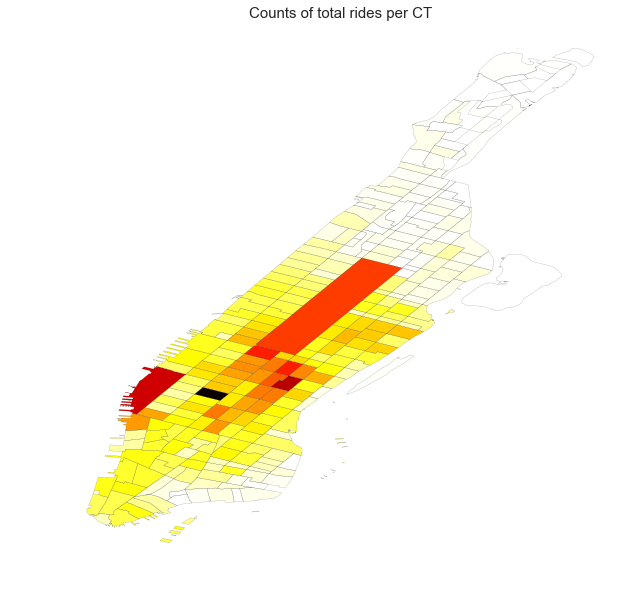

In [31]:
f, ax = plt.subplots(figsize=(10,10))
ct2010Agg.plot(column='countPerCT',cmap='hot_r',
                         alpha=1,linewidth=0.1,ax=ax)
plt.xlabel('Longitude', fontsize = 13)
plt.ylabel('Latitude', fontsize = 13)
plt.title("Counts of total rides per CT", fontsize = 15)
ax.set_axis_off()

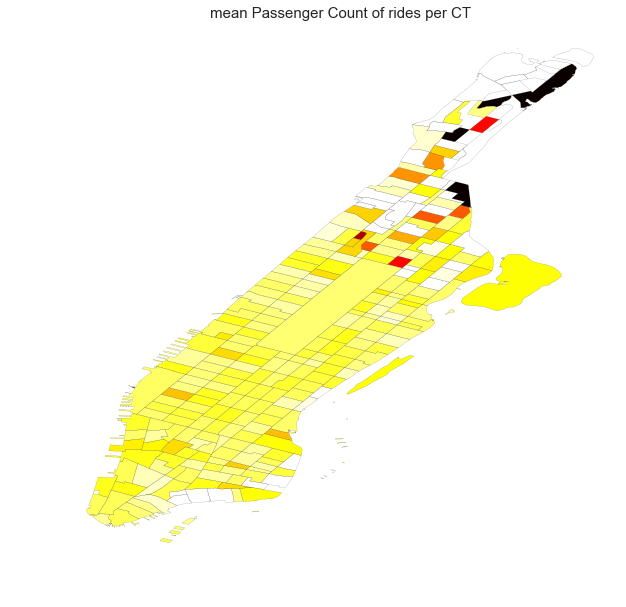

In [32]:
f, ax = plt.subplots(figsize=(10,10))
ct2010Agg.plot(column='meanPassengerCount',cmap='hot_r',
                         alpha=1,linewidth=0.1,ax=ax)
plt.xlabel('Longitude', fontsize = 13)
plt.ylabel('Latitude', fontsize = 13)
plt.title("mean Passenger Count of rides per CT", fontsize = 15)
ax.set_axis_off()

In [33]:
#Saving as shapefile
ct2010Agg.to_file('data/nyct2010_17c/ct2010AggDropoff.shp')

### Spatial Weights

In [37]:
qwCT = ps.queen_from_shapefile('data/nyct2010_17c/ct2010AggDropoff.shp')
Wmatrix, ids = qwCT.full()
qwCT.transform = 'r'

('WARNING: ', 95, ' is an island (no neighbors)')
('WARNING: ', 196, ' is an island (no neighbors)')


### Analyzing counts of taxi trips

In [38]:
counts=ct2010Agg.countPerCT
countsLag=ps.lag_spatial(qwCT, counts)
countsLag10 = ps.Quantiles(countsLag, k=10)
countsLag10

               Quantiles                
 
Lower            Upper             Count
         x[i] <=  2.900               28
 2.900 < x[i] <=  4.840               27
 4.840 < x[i] <=  8.112               27
 8.112 < x[i] <= 20.443               28
20.443 < x[i] <= 31.117               27
31.117 < x[i] <= 37.193               27
37.193 < x[i] <= 43.620               28
43.620 < x[i] <= 53.700               27
53.700 < x[i] <= 65.088               27
65.088 < x[i] <= 93.429               28

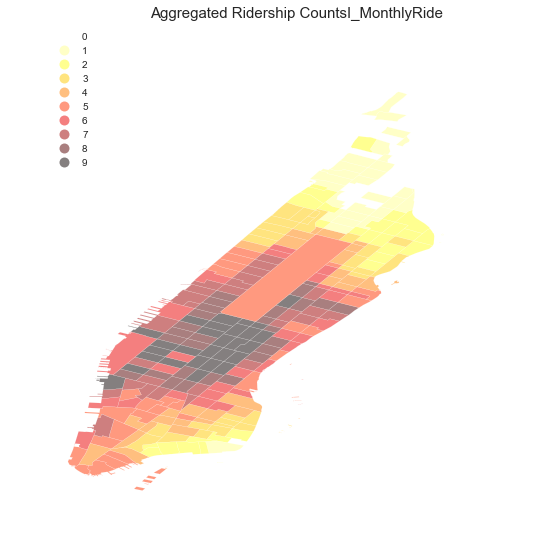

In [39]:
f, ax = plt.subplots(figsize=(9, 9))
ct2010Agg.assign(cl=countsLag10.yb).plot(column='cl', categorical=True, 
        k=10, cmap='hot_r', linewidth=0.1, ax=ax, 
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.title("Aggregated Ridership CountsI_MonthlyRide", fontsize = 15)

### Global Moran's I

In [41]:
globalMoranI = ps.Moran(counts, qwCT)
print "Spatial Autocorrelation index is %s which has p-val %s"%(globalMoranI.I, globalMoranI.p_sim)

Spatial Autocorrelation index is 0.64228310488 which has p-val 0.001


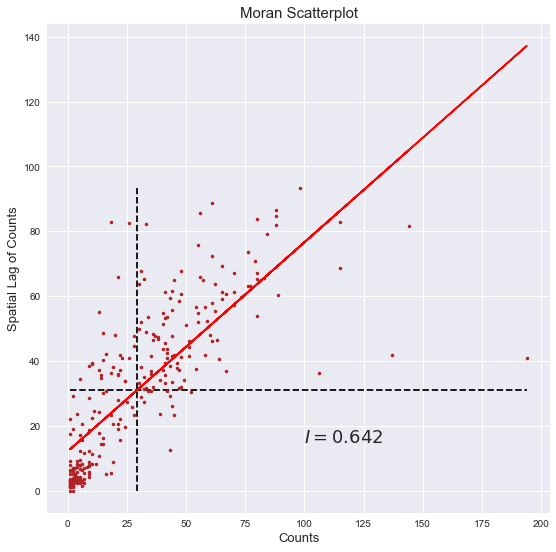

In [42]:
b, a = np.polyfit(counts, countsLag, 1)

f, ax = plt.subplots(1, figsize=(9, 9))

plt.plot(counts, countsLag, '.', color='firebrick')

 # dashed vert at mean of the last year's PCI
plt.vlines(counts.mean(), countsLag.min(), countsLag.max(), linestyle='--')
 # dashed horizontal at mean of lagged PCI
plt.hlines(countsLag.mean(), counts.min(), counts.max(), linestyle='--')

plt.text(s='$I = %.3f$' % globalMoranI.I, x=100, y=15, fontsize=18)
# red line of best fit using global I as slope
plt.plot(counts, a + b*counts, 'r')
plt.title('Moran Scatterplot', fontsize = 15)
plt.ylabel('Spatial Lag of Counts', fontsize = 13)
plt.xlabel('Counts', fontsize = 13)

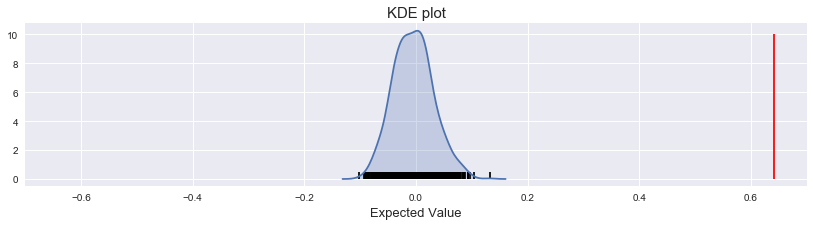

In [43]:
plt.rcParams['figure.figsize']=(14,3)

sns.kdeplot(globalMoranI.sim, shade=True)
plt.vlines(globalMoranI.sim, 0, 0.5)
plt.vlines(globalMoranI.I, 0, 10, 'r')
plt.xlim([-.70, .70])
plt.title('KDE plot', fontsize = 15)
plt.xlabel('Expected Value', fontsize = 13)

### Local Indicators of Spatial Association (LISA)

In [44]:
LMo_count = ps.Moran_Local(counts, qwCT,permutations=999)
LMo_count.Is[0:5], LMo_count.p_sim[0:5]

(array([ 1.55385626,  3.18426005,  5.39115293,  3.94163882,  1.33102165]),
 array([ 0.016,  0.001,  0.001,  0.001,  0.008]))

In [45]:
sigs = counts[LMo_count.p_sim <= .001]
W_sigs = countsLag[LMo_count.p_sim  <= .001]
insigs = counts[LMo_count.p_sim > .001]
W_insigs = countsLag[LMo_count.p_sim > .001]

### Significant LISA

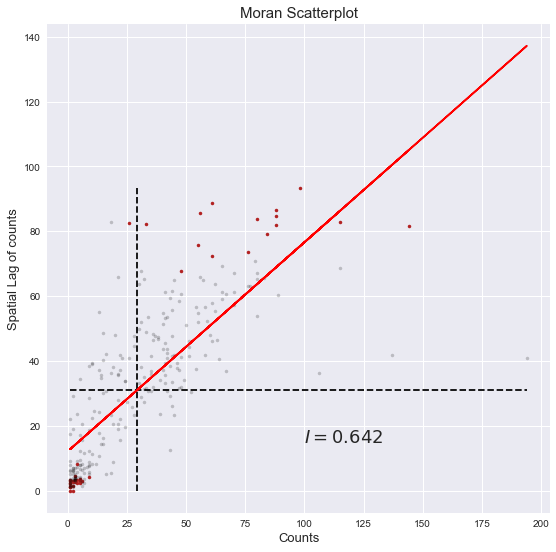

In [46]:
f, ax = plt.subplots(figsize=(9, 9))
plt.plot(sigs, W_sigs, '.', color='firebrick')
plt.plot(insigs, W_insigs, '.k', alpha=.2)
plt.text(s='$I = %.3f$' % globalMoranI.I, x=100, y=15, fontsize=18)

 # dashed vert at mean of the last year's PCI
plt.vlines(counts.mean(), countsLag.min(), countsLag.max(), linestyle='--')
 # dashed horizontal at mean of lagged PCI
plt.hlines(countsLag.mean(), counts.min(), counts.max(), linestyle='--')

# red line of best fit using global I as slope
plt.plot(counts, a + b*counts, 'r')
plt.title('Moran Scatterplot', fontsize = 15)
plt.ylabel('Spatial Lag of counts', fontsize = 13)
plt.xlabel('Counts', fontsize = 13)

In [47]:
sig = LMo_count.p_sim < 0.01
hotspots = LMo_count.q==1 * sig
coldspots = LMo_count.q==3 * sig
print "Number of Hotspots:", hotspots.sum()
print "Number of Coldspots:", coldspots.sum()

Number of Hotspots: 32
Number of Coldspots: 60


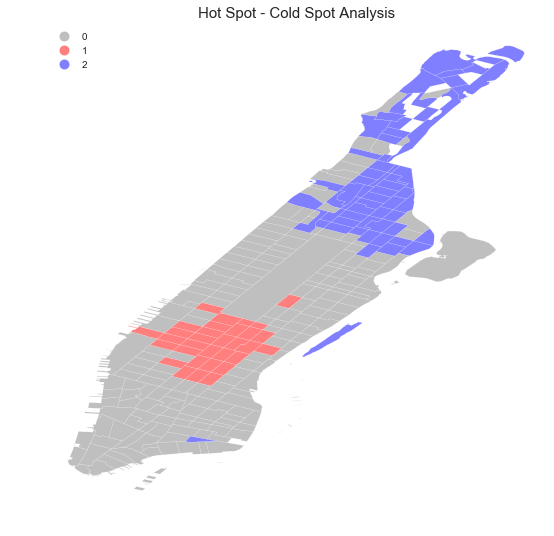

In [48]:
hcmap = mpl.colors.ListedColormap(['grey','red','blue'])
hotcold = hotspots*1 + coldspots*2

f, ax = plt.subplots(figsize=(9, 9))
ct2010Agg.assign(cl=hotcold).plot(column='cl', categorical=True, 
         cmap=hcmap, linewidth=0.1, ax=ax, 
         edgecolor='white', legend=True)
ax.set_axis_off()
plt.title("Hot Spot - Cold Spot Analysis", fontsize = 15)

### As in pickups, even for dropoffs we see hot spots around midtown manhattan and cold spots around parts of Manhattan above Central park

In [59]:
sig = LMo_count.p_sim < 0.01
hotspots = LMo_count.q==1 * sig
coldspots = LMo_count.q==3 * sig
LH = LMo_count.q == 2 * sig
HL = LMo_count.q == 4 * sig
print "Number of Hotspots:", hotspots.sum()
print "Number of Coldspots:", coldspots.sum()
print "Number of Low Hot:", LH.sum()
print "Number of Hot Low", HL.sum()

Number of Hotspots: 32
Number of Coldspots: 60
Number of Low Hot: 3
Number of Hot Low 0


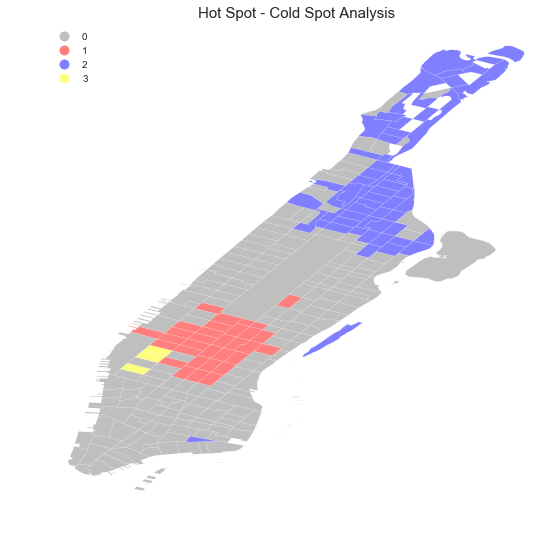

In [63]:
hcmap = mpl.colors.ListedColormap(['grey','red','blue', 'yellow' ])
hotcold = hotspots*1 + coldspots*2 + LH * 3 

f, ax = plt.subplots(figsize=(9, 9))
ct2010Agg.assign(cl=hotcold).plot(column='cl', categorical=True, 
         cmap=hcmap, linewidth=0.1, ax=ax, 
         edgecolor='white', legend=True)
ax.set_axis_off()
plt.title("Hot Spot - Cold Spot Analysis", fontsize = 15)